In [1]:
import torch  # libreria per i tensori
from torchvision import datasets, transforms  # dataset contiene dataset predefiniti e transforms viene utilizzato per processare le immagini
from torch.utils.data import DataLoader  # utile per creare batch di dati

In [2]:
def get_dataloader(batch_size):
    transform = transforms.Compose([
        transforms.ToTensor(),  # Normalizza i valori dei pixel da [0, 255] a [0.0, 1.0]
        transforms.Normalize((0.5,), (0.5,))  # Normalizzo i valori dei pixel e li porto in un intervallo [-1, 1]
        # (0.5,) indica la media e la deviazione standard per ogni canale dell'immagine, in questo caso la scala di grigi
    ])
    
    dataset = datasets.MNIST(
        root='./data',  # Directory dove salvare/leggere il dataset
        train=True,     # Usiamo il set di addestramento
        download=True,  # Scarica il dataset se non è presente
        transform=transform  # Applica le trasformazioni definite sopra
    )
    
    dataloader = DataLoader( #organizzo i dati in batch tramite il DataLoader
        dataset,
        batch_size=batch_size,  # Numero di immagini da passare alla rete neurale alla volta
        shuffle=True  # Mescola i dati per l'addestramento
    )
    
    return dataloader



In [3]:
dataloader = get_dataloader(batch_size=64)
for images, labels in dataloader:
    print(f"Forma del batch di immagini: {images.shape}")
    print(f"Forma del batch di etichette: {labels.shape}")
    break


100%|██████████████████████████████████████| 9.91M/9.91M [00:04<00:00, 2.40MB/s]
100%|███████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 261kB/s]
100%|██████████████████████████████████████| 1.65M/1.65M [00:00<00:00, 2.21MB/s]
100%|██████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 1.55MB/s]

Forma del batch di immagini: torch.Size([64, 1, 28, 28])
Forma del batch di etichette: torch.Size([64])


In [4]:
# ([64, 1, 28, 28]): 64 è il batch size, 1 è il numero di canali e 28 sono altezza e larghezza delle immagini

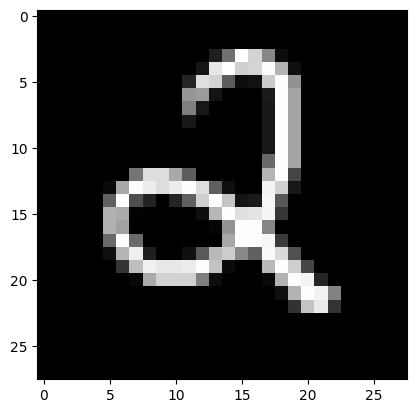

In [5]:
import matplotlib.pyplot as plt
plt.imshow(images[0][0], cmap='gray')  # Prima immagine del batch
plt.show()